In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import mplfinance as mpf
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading The Data Using Yfinance Library

In [3]:
Stock = 'GOOG'
start = dt.datetime(2010,1,1)
end = dt.datetime(2023,1,1)
data = yf.download(Stock, start, end)


*********************100%***********************]  1 of 1 completed

In [4]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2010-01-04,15.571998,15.610239,15.678981,15.547723,15.615220,78541293
2010-01-05,15.503423,15.541497,15.637387,15.480475,15.620949,120638494
2010-01-06,15.112601,15.149715,15.588072,15.102393,15.588072,159744526
2010-01-07,14.760787,14.797037,15.193053,14.760922,15.178109,257533695
2010-01-08,14.957565,14.994298,15.024933,14.672753,14.744733,189680313
...,...,...,...,...,...,...
2022-12-23,89.589981,89.809998,90.099998,87.620003,87.620003,17815000
2022-12-27,87.714592,87.930000,89.500000,87.535004,89.309998,15470900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  3272 non-null   float64
 1   (Close, GOOG)      3272 non-null   float64
 2   (High, GOOG)       3272 non-null   float64
 3   (Low, GOOG)        3272 non-null   float64
 4   (Open, GOOG)       3272 non-null   float64
 5   (Volume, GOOG)     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [6]:
#Analysis of Data

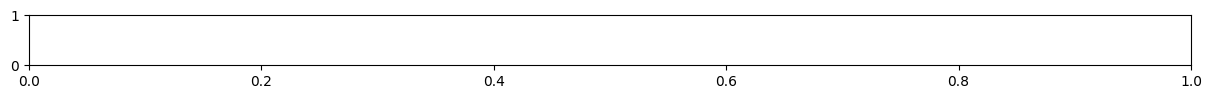

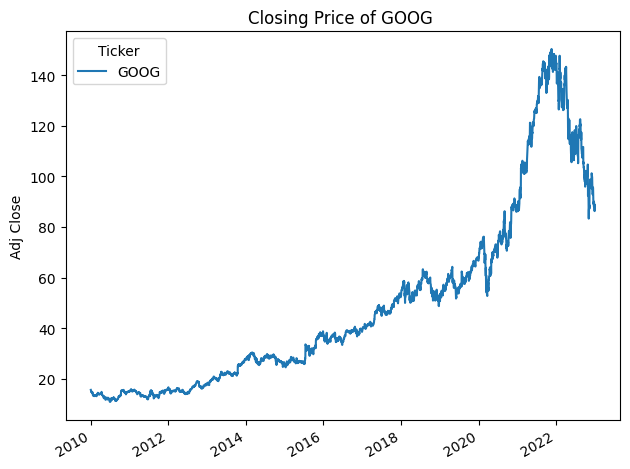

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(1, 1, 1) 
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {Stock} ") 

plt.tight_layout()
plt.show()

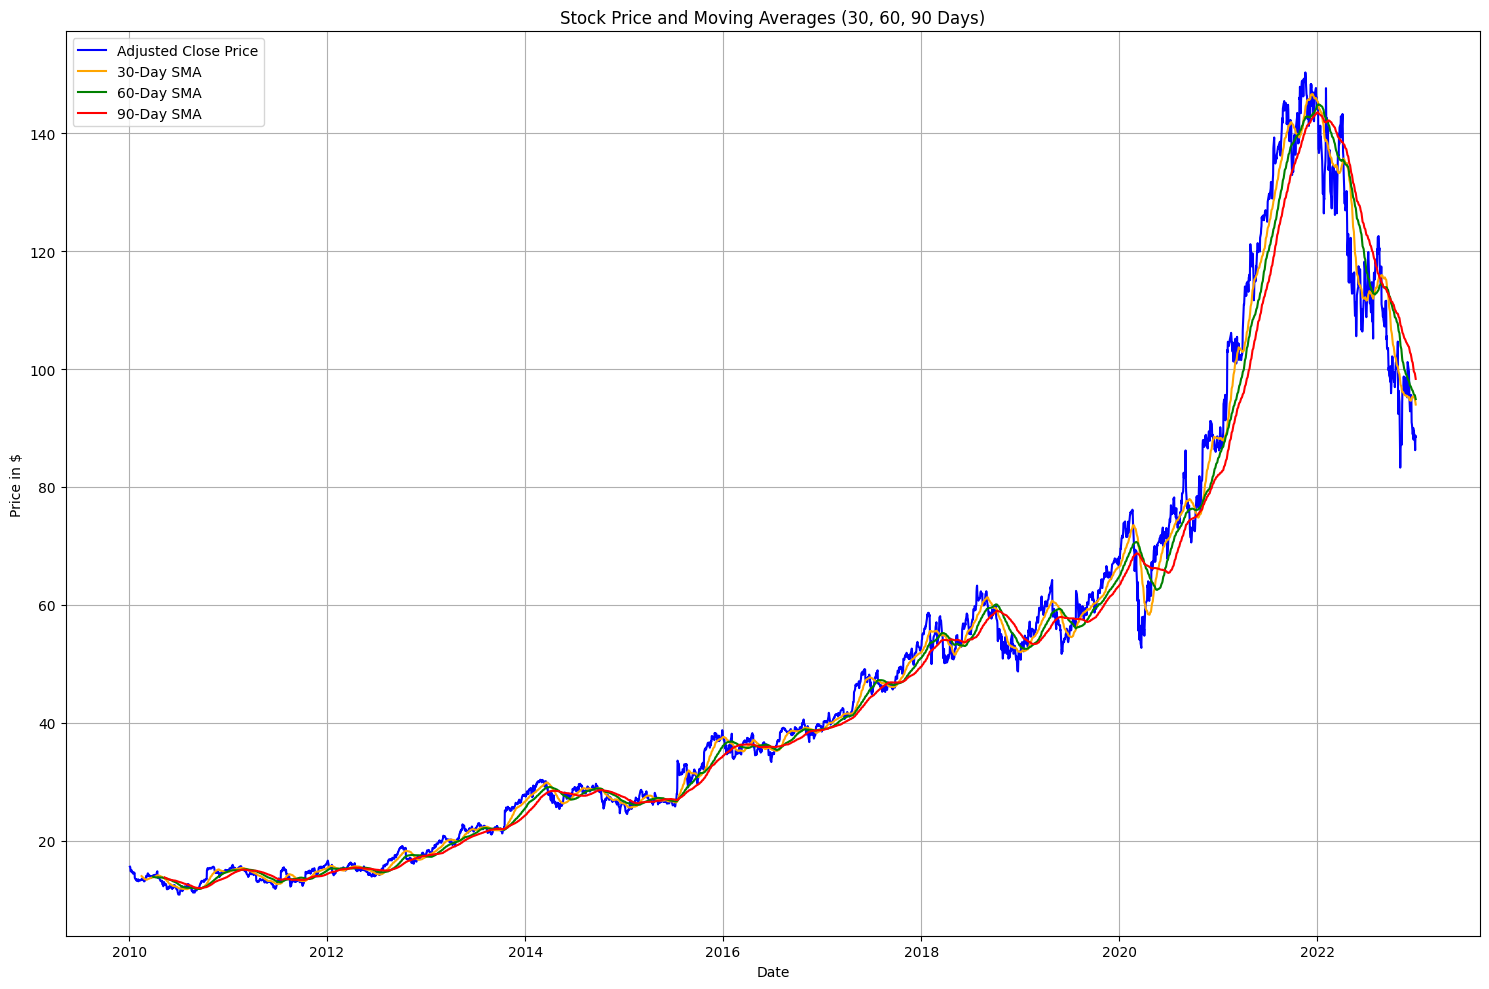

In [8]:
#Moving Avgerage
short_window = 30 
medium_window = 60  
long_window = 90   

data['30_Day_MA'] = data['Adj Close'].rolling(window=short_window).mean()
data['60_Day_MA'] = data['Adj Close'].rolling(window=medium_window).mean()
data['90_Day_MA'] = data['Adj Close'].rolling(window=long_window).mean()
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(data['30_Day_MA'], label='30-Day SMA', color='orange')
plt.plot(data['60_Day_MA'], label='60-Day SMA', color='green')
plt.plot(data['90_Day_MA'], label='90-Day SMA', color='red')

plt.title('Stock Price and Moving Averages (30, 60, 90 Days)')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
#PreProcessing Of Data

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [11]:
scaled_data

array([[0.03395973],
       [0.03346818],
       [0.0306667 ],
       ...,
       [0.54057964],
       [0.55838467],
       [0.55681158]])

In [12]:
#Spliting of Train Data

In [13]:
prediction_days=60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0]) 
    y_train.append(scaled_data[x, 0])  

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
y_train = np.array(y_train) 

In [14]:
#Model Creation Using LSTM & Dense layer

In [15]:
model = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    keras.layers.LSTM(50, return_sequences=False),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\KIIT\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#Fitting Data in to the Model

In [33]:
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 2.9190e-04
Epoch 2/3
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 2.7039e-04
Epoch 3/3
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 2.5669e-04


In [34]:
#Creating Test_data for the Model

In [35]:
test_start= dt.datetime(2023,1,1)
test_end= dt.datetime.now()

test_data= yf.download(Stock,test_start, test_end)


*********************100%***********************]  1 of 1 completed

In [36]:
test_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-01-03,89.480255,89.699997,91.550003,89.019997,89.830002,20738500
2023-01-04,88.492676,88.709999,91.239998,87.800003,91.010002,27046500
2023-01-05,86.557426,86.769997,88.209999,86.559998,88.070000,23136100
2023-01-06,87.944031,88.160004,88.470001,85.570000,87.360001,26612600
2023-01-09,88.582466,88.800003,90.830002,88.580002,89.195000,22996700
...,...,...,...,...,...,...
2024-12-03,173.020004,173.020004,174.320007,172.509995,173.119995,15721500
2024-12-04,176.089996,176.089996,176.429993,172.750000,172.779999,18239800


In [37]:
actual_prices= test_data['Close']

In [38]:
total_data = pd.concat((data['Close'], test_data['Close']),axis=0)
total_data

Ticker,GOOG
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298
...,...
2024-12-03,173.020004
2024-12-04,176.089996
2024-12-05,174.309998


In [39]:
model_input= total_data[len(total_data)- len(test_data)- prediction_days:].values
model_input.reshape(-1,1)
model_input = scaler.fit_transform(model_input)

In [40]:
X_test=[]

for x in range(prediction_days, len(model_input)):
    X_test.append(model_input[x-prediction_days:x,0])

X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [41]:
#Testing the Model by Predicting Exsisting data

In [42]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [43]:
#Measuring the Accuracy of the Model

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(actual_prices, predictions)
mse = mean_squared_error(actual_prices, predictions)
rmse = mean_squared_error(actual_prices, predictions, squared=False)
r2 = r2_score(actual_prices, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



MAE: 3.8464182201596993
MSE: 23.93283319676838
RMSE: 4.892119499436658
R-squared: 0.9665126204490662


C:\Users\KIIT\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


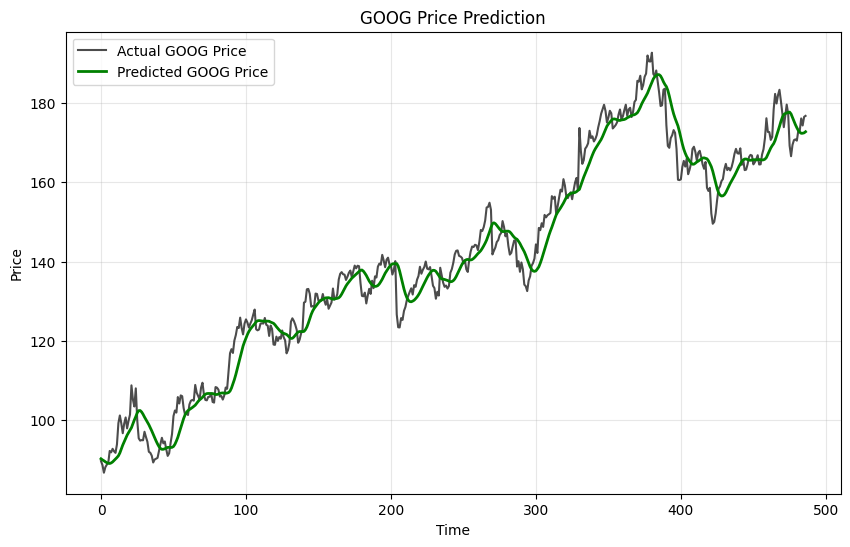

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(actual_prices)), actual_prices, color="black", label=f"Actual {Stock} Price", alpha=0.7)
plt.plot(predictions, color="green", label=f"Predicted {Stock} Price", linewidth=2)

plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f"{Stock} Price Prediction")
plt.legend()
plt.grid(alpha=0.3)  
plt.show()


In [46]:
real_data= [model_input[len(model_input)+1-prediction_days:len(model_input+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [47]:
next_day_price= model.predict(real_data)
next_day_price= scaler.inverse_transform(next_day_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [48]:
next_day_price

array([[173.11766]], dtype=float32)